## Grassmannian diffusion maps based dimension reduction and classification for high-dimensional data

#### By: Ketson R. M. dos Santos, Dimitris G. Giovanis, and Michael D. Shields.


### Example 1: Structured data on the unit sphere in R^3.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from Utilities import *
import scipy.spatial.distance as sd
import copy

from DimensionReduction import Grassmann
from DimensionReduction import DiffusionMaps 
from DimensionReduction import GeometricHarmonics 
import numpy.random as rnd
import random #

Gr = Grassmann(distance_method=Grassmann.grassmann_distance, 
               kernel_method=Grassmann.projection_kernel,
               kernel_composition="prod")

#### Generate the random samples on the cone like structure constrained by $sin(\phi)=cos^2(\psi)$.

In [5]:
# Random seed for reproducibility.
random.seed(1111)

x = list()
y = list()
z = list()
xn = []
yn = []
zn = []

# N is the number of samples.
N=3000 
rvs = []
mag = []
for i in range(N):
    # Random angle.
    t = random.uniform(-np.pi/2,np.pi/2)
    s = np.arcsin(np.cos(t) ** 2)
    r0 = random.uniform(-2,2)
    r = abs(r0)

    rvs.append([r0,t])
    mag.append(r)
    x0 = r * np.sin(t) * np.cos(s)
    y0 = r0 * np.sin(t) * np.sin(s)
    z0 = r * np.cos(t)
    
    x.append(x0)
    y.append(y0)
    z.append(z0)
    
    # Normalized random samples = points on the Grassmann manifold (unit sphere).
    nrm = np.linalg.norm([x0, y0, z0])
    xn.append(x0/nrm)
    yn.append(y0/nrm)
    zn.append(z0/nrm) 
  
    
rvs = np.array(rvs)

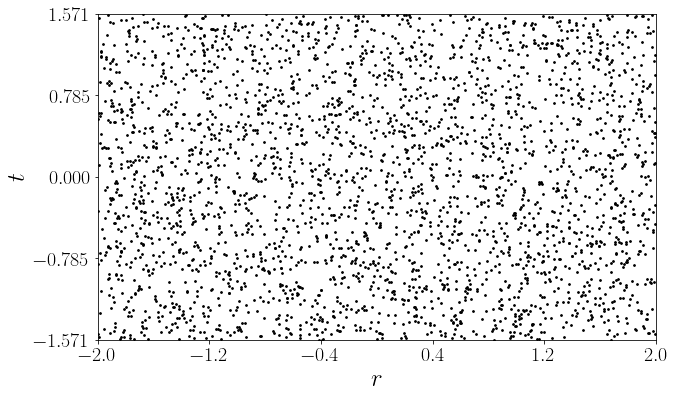

In [19]:
# Plot parameters (r, t).

from matplotlib.legend_handler import HandlerLine2D
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

fig, ax = plt.subplots(num=None, figsize=(10, 6))
ax.scatter(rvs[:,0],rvs[:,1],c='k',s=3)
plt.xlim(-2,2)
plt.ylim(-np.pi/2,np.pi/2)
plt.xlabel('$r$', fontsize=25)
plt.ylabel('$t$', fontsize=25)
plt.xticks(np.arange(-2, 2.1, step=0.8), fontsize=20)
plt.yticks(np.arange(-np.pi/2, np.pi/2+0.1, step=np.pi/4), fontsize=20)
plt.show()

#### Compute the kernel matrix.

In [6]:
# Function to compute the Grassmannian kernel.

def kernelmat(Xn):
    
    nargs = len(Xn)
    ker = np.empty((nargs * (nargs - 1)) // 2, dtype=np.double)
    k = 0
    for i in range(0, nargs - 1):
        for j in range(i + 1, nargs):

            ker[k] = np.dot(Xn[i],Xn[j])**2
            k = k + 1

    kernel = sd.squareform(ker) + np.eye(nargs) 
    
    return kernel

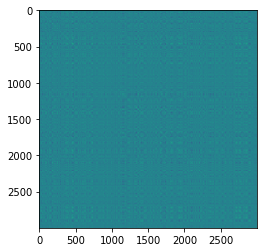

In [8]:
# Get the kernel matrix and plot it.

X = np.array([x,y,z]).T
Xn = np.array([xn,yn,zn]).T
kernel_matrix = kernelmat(Xn)

plt.imshow(kernel_matrix)

#### Perform the conventional and the Grassmannian Diffusion Maps.

In [18]:
# Grassmannian diffusion maps.
dfmn = DiffusionMaps(alpha=0.5, n_evecs=10)
g0n, evalsn, evecsn = dfmn.mapping(kernel_matrix=kernel_matrix)

# Conventional diffusion maps.
dfm = DiffusionMaps(alpha=0.5, n_evecs=10)
g0, evals, evecs = dfm.mapping(data=X)

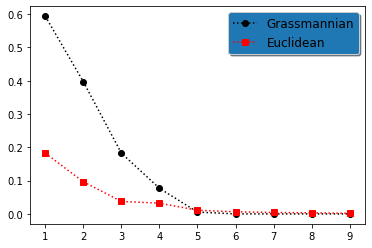

In [17]:
# Plot eigenvalues.

eigenvalues_index = np.arange(1,len(evals))

fig, ax = plt.subplots()
ax.plot(eigenvalues_index, evalsn[1:], 'ko:', label='Grassmannian')
ax.plot(eigenvalues_index, evals[1:], 'rs:', label='Euclidean')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.show()

#### FIGURE 3

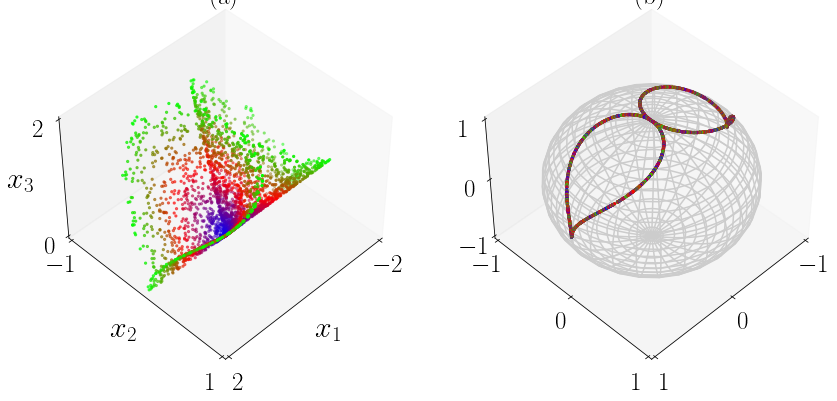

In [21]:
idd1 = 1
idd2 = 2
szlab = 30
szfig=25
sztk = 25
fig = plt.figure(figsize=(14, 7))

#===============
#  First subplot
#===============
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(x, y, z, c=mag, cmap=plt.cm.brg, s=5)
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel('$x_1$', fontsize=szlab, rotation = 0)
ax.yaxis.set_rotate_label(False) 
ax.set_ylabel('$x_2$', fontsize=szlab, rotation = 0)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$x_3$', fontsize=szlab, rotation = 0)

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,2)
ax.set_xticks(np.arange(-2, 2.1, step=4))
ax.set_yticks(np.arange(-1, 1.1, step=2))
ax.set_zticks(np.arange(0, 2.1, step=2))
ax.grid(False)
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-2.0,-1.0,2.3, s="(a)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')

aa=0.03
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(xs, ys, zs, color=(0.8,0.8,0.8))
ax.scatter(np.array(xn)+aa, np.array(yn)+aa, np.array(zn)+aa, c=mag, cmap=plt.cm.brg, s=5)
ax.grid(False)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, step=1))
ax.set_yticks(np.arange(-1, 1.1, step=1))
ax.set_zticks(np.arange(-1, 1.1, step=1))
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-1.0,-1.0,1.3, s="(b)", size=szfig, horizontalalignment='center', verticalalignment='center')

plt.show()



#### FIGURE 4

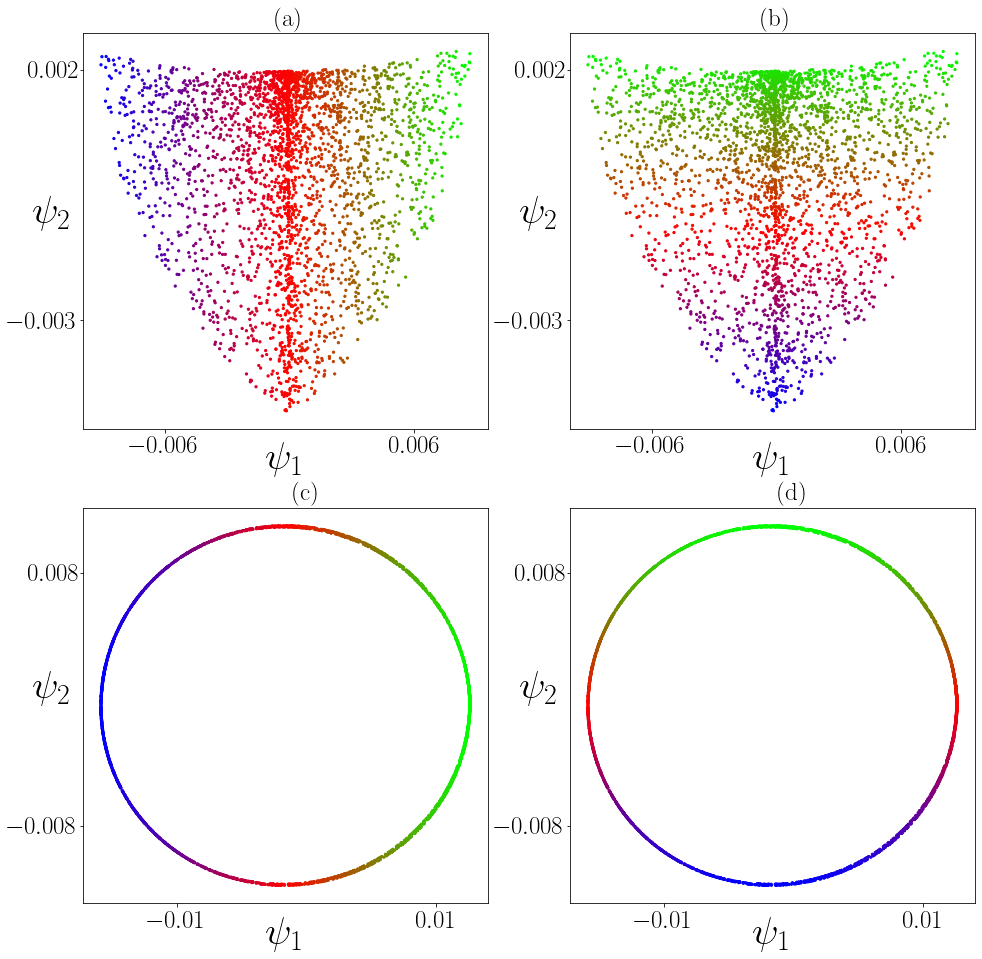

In [26]:
idd1 = 1
idd2 = 2
szlab = 40
szfig=25
sztk = 25
fig = plt.figure(figsize=(16, 16))

#===============
# FIRST subplot
#===============
ax = fig.add_subplot(2, 2, 1)
ax.scatter(g0[:,1], g0[:,2], c=g0[:,1], cmap=plt.cm.brg, s=5)
ax.set_xlabel('$\psi_1$', fontsize=szlab, rotation = 0, labelpad=-16)
ax.set_ylabel('$\psi_2$', fontsize=szlab, rotation = 0, labelpad=-45)
ax.set_xticks(np.arange(-0.006, 0.0061, step=0.012))
ax.set_yticks(np.arange(-0.003, 0.0021, step=0.005))
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.tick_params(axis="y",direction="out", pad=0)
ax.text(0,0.003, s="(a)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# SECOND subplot
#===============
ax = fig.add_subplot(2, 2, 2)
ax.scatter(g0[:,1], g0[:,2], c=g0[:,2], cmap=plt.cm.brg, s=5)
ax.set_xlabel('$\psi_1$', fontsize=szlab, rotation = 0, labelpad=-16)
ax.set_ylabel('$\psi_2$', fontsize=szlab, rotation = 0, labelpad=-45)
ax.set_xticks(np.arange(-0.006, 0.0061, step=0.012))
ax.set_yticks(np.arange(-0.003, 0.0021, step=0.005))
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.tick_params(axis="y",direction="out", pad=0)
ax.text(0,0.003, s="(b)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# THIRD subplot
#===============
ax = fig.add_subplot(2, 2, 3)
ax.scatter(g0n[:,1], g0n[:,2], c=g0n[:,1], cmap=plt.cm.brg, s=5)
ax.set_xlabel('$\psi_1$', fontsize=szlab, rotation = 0, labelpad=-16)
ax.set_ylabel('$\psi_2$', fontsize=szlab, rotation = 0, labelpad=-45)
ax.set_xticks([-0.01,0.01])
ax.set_yticks([-0.008,0.008])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.tick_params(axis="y",direction="out", pad=0)
ax.text(0,0.013, s="(c)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# FOURTH subplot
#===============
ax = fig.add_subplot(2, 2, 4)
ax.scatter(g0n[:,1], g0n[:,2], c=g0n[:,2], cmap=plt.cm.brg, s=5)
ax.set_xlabel('$\psi_1$', fontsize=szlab, rotation = 0, labelpad=-16)
ax.set_ylabel('$\psi_2$', fontsize=szlab, rotation = 0, labelpad=-45)
ax.set_xticks([-0.01,0.01])
ax.set_yticks([-0.008,0.008])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.tick_params(axis="y",direction="out", pad=0)
ax.text(0,0.013, s="(d)", size=szfig, horizontalalignment='center', verticalalignment='center')
plt.show()

#### FIGURE 5

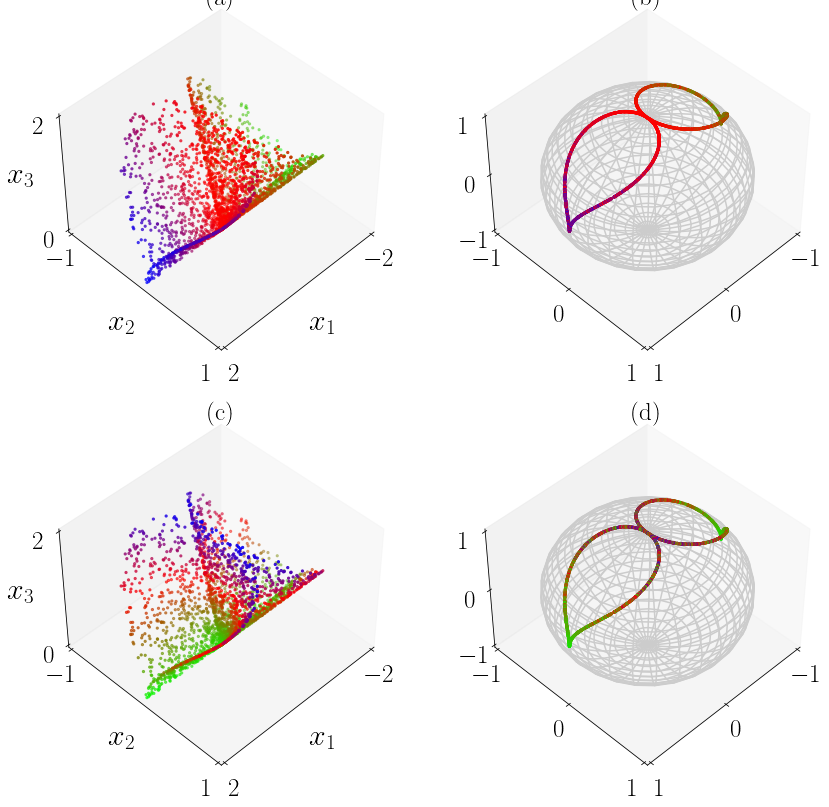

In [22]:
idd1 = 1
idd2 = 2
szlab = 30
szfig=25
sztk = 25
fig = plt.figure(figsize=(14, 14))

#===============
#  FIRST subplot
#===============
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.scatter(x, y, z, c=g0[:,idd1], cmap=plt.cm.brg, s=5)
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel('$x_1$', fontsize=szlab, rotation = 0)
ax.yaxis.set_rotate_label(False) 
ax.set_ylabel('$x_2$', fontsize=szlab, rotation = 0)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$x_3$', fontsize=szlab, rotation = 0)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,2)
ax.set_xticks([-2,2])
ax.set_yticks([-1,1])
ax.set_zticks([0,2])
ax.grid(False)
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-2.0,-1.0,2.3, s="(a)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
#  THIRD subplot
#===============
ax = fig.add_subplot(2, 2, 3, projection='3d')

ax.scatter(x, y, z, c=g0[:,idd2], cmap=plt.cm.brg, s=5)
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel('$x_1$', fontsize=szlab, rotation = 0)
ax.yaxis.set_rotate_label(False) 
ax.set_ylabel('$x_2$', fontsize=szlab, rotation = 0)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$x_3$', fontsize=szlab, rotation = 0)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,2)
ax.set_xticks([-2,2])
ax.set_yticks([-1,1])
ax.set_zticks([0,2])
ax.grid(False)
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-2.0,-1.0,2.3, s="(c)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# SECOND subplot
#===============
ax = fig.add_subplot(2, 2, 2, projection='3d')

aa=0.03
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(xs, ys, zs, color=(0.8,0.8,0.8))
ax.scatter(np.array(xn)+aa, np.array(yn)+aa, np.array(zn)+aa, c=g0[:,idd1], cmap=plt.cm.brg, s=5)
ax.grid(False)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, step=1))
ax.set_yticks(np.arange(-1, 1.1, step=1))
ax.set_zticks(np.arange(-1, 1.1, step=1))
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-1.0,-1.0,1.3, s="(b)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# FOURTH subplot
#===============
ax = fig.add_subplot(2, 2, 4, projection='3d')

aa=0.03
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(xs, ys, zs, color=(0.8,0.8,0.8))
ax.scatter(np.array(xn)+aa, np.array(yn)+aa, np.array(zn)+aa, c=g0[:,idd2], cmap=plt.cm.brg, s=5)
ax.grid(False)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, step=1))
ax.set_yticks(np.arange(-1, 1.1, step=1))
ax.set_zticks(np.arange(-1, 1.1, step=1))
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-1.0,-1.0,1.3, s="(d)", size=szfig, horizontalalignment='center', verticalalignment='center')

plt.show()



#### FIGURE 6

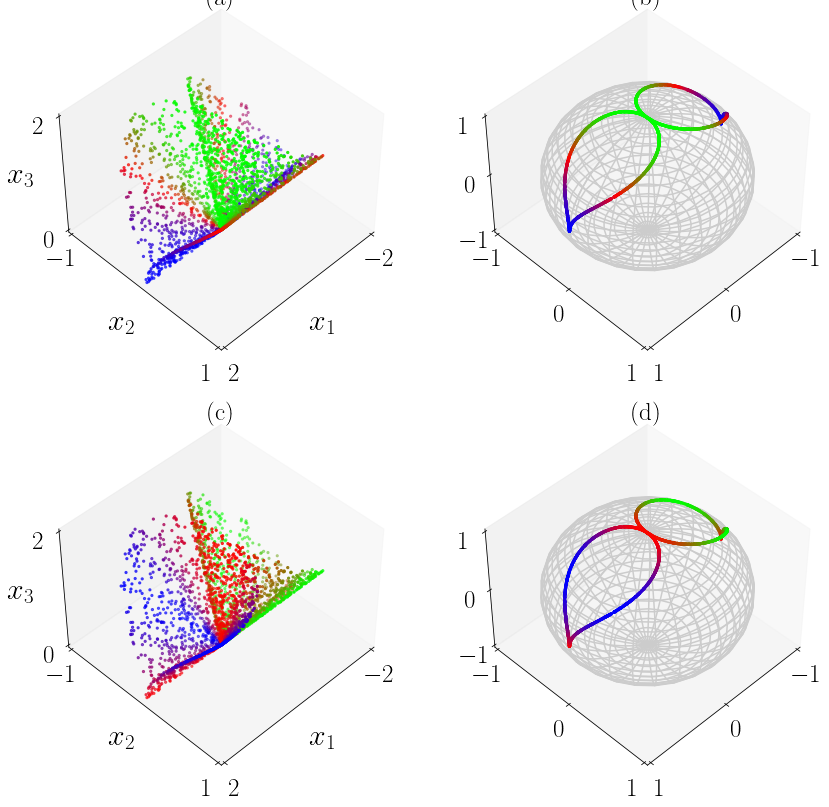

In [23]:
idd1 = 1
idd2 = 2
szlab = 30
szfig=25
sztk = 25
fig = plt.figure(figsize=(14, 14))

#===============
#  FIRST subplot
#===============
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.scatter(x, y, z, c=g0n[:,idd1], cmap=plt.cm.brg, s=5)
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel('$x_1$', fontsize=szlab, rotation = 0)
ax.yaxis.set_rotate_label(False) 
ax.set_ylabel('$x_2$', fontsize=szlab, rotation = 0)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$x_3$', fontsize=szlab, rotation = 0)

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,2)
ax.set_xticks([-2,2])
ax.set_yticks([-1,1])
ax.set_zticks([0,2])
ax.grid(False)
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-2.0,-1.0,2.3, s="(a)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
#  THIRD subplot
#===============
ax = fig.add_subplot(2, 2, 3, projection='3d')

ax.scatter(x, y, z, c=g0n[:,idd2], cmap=plt.cm.brg, s=5)
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel('$x_1$', fontsize=szlab, rotation = 0)
ax.yaxis.set_rotate_label(False) 
ax.set_ylabel('$x_2$', fontsize=szlab, rotation = 0)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$x_3$', fontsize=szlab, rotation = 0)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,2)
ax.set_xticks([-2,2])
ax.set_yticks([-1,1])
ax.set_zticks([0,2])
ax.grid(False)
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-2.0,-1.0,2.3, s="(c)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# SECOND subplot
#===============
ax = fig.add_subplot(2, 2, 2, projection='3d')

aa=0.03
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(xs, ys, zs, color=(0.8,0.8,0.8))
ax.scatter(np.array(xn)+aa, np.array(yn)+aa, np.array(zn)+aa, c=g0n[:,idd1], cmap=plt.cm.brg, s=5)
ax.grid(False)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, step=1))
ax.set_yticks(np.arange(-1, 1.1, step=1))
ax.set_zticks(np.arange(-1, 1.1, step=1))
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-1.0,-1.0,1.3, s="(b)", size=szfig, horizontalalignment='center', verticalalignment='center')

#===============
# FOURTH subplot
#===============
ax = fig.add_subplot(2, 2, 4, projection='3d')

aa=0.03
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(xs, ys, zs, color=(0.8,0.8,0.8))
ax.scatter(np.array(xn)+aa, np.array(yn)+aa, np.array(zn)+aa, c=g0n[:,idd2], cmap=plt.cm.brg, s=5)
ax.grid(False)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, step=1))
ax.set_yticks(np.arange(-1, 1.1, step=1))
ax.set_zticks(np.arange(-1, 1.1, step=1))
ax.view_init(45, 45)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(sztk)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(sztk)
ax.text(-1.0,-1.0,1.3, s="(d)", size=szfig, horizontalalignment='center', verticalalignment='center')

plt.show()